In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.feature_selection import *
from sklearn.ensemble import RandomForestClassifier as RFC
plt.style.use('fivethirtyeight') # 制定画风风格
import warnings
warnings.filterwarnings('ignore') #将警告滤掉
%matplotlib inline

pd.set_option('display.float_format', lambda x:'%.6f'% x)
np.set_printoptions(precision = 10, suppress = True)

In [2]:
data = pd.read_csv('C:\\Users\\XRUI\\Desktop\\数据挖掘\\project1\\churn_training.csv')
data.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
0,KS,128,415,382-4657,0,1,25,265.100000,110,45.070000,...,99,16.780000,244.700000,91,11.010000,10.000000,3,2.700000,1,0
1,OH,84,408,375-9999,1,0,0,299.400000,71,50.900000,...,88,5.260000,196.900000,89,8.860000,6.600000,7,1.780000,2,0
2,OK,75,415,330-6626,1,0,0,166.700000,113,28.340000,...,122,12.610000,186.900000,121,8.410000,10.100000,3,2.730000,3,0
3,AL,118,510,391-8027,1,0,0,223.400000,98,37.980000,...,101,18.750000,203.900000,118,9.180000,6.300000,6,1.700000,0,0
4,LA,117,408,335-4719,0,0,0,184.500000,97,31.370000,...,80,29.890000,215.800000,90,9.710000,8.700000,4,2.350000,1,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          2000 non-null   object 
 1   account_length                 2000 non-null   int64  
 2   area_code                      2000 non-null   int64  
 3   phone_number                   2000 non-null   object 
 4   international_plan             2000 non-null   int64  
 5   voice_mail_plan                2000 non-null   int64  
 6   number_vmail_messages          2000 non-null   int64  
 7   total_day_minutes              2000 non-null   float64
 8   total_day_calls                2000 non-null   int64  
 9   total_day_charge               2000 non-null   float64
 10  total_eve_minutes              2000 non-null   float64
 11  total_eve_calls                2000 non-null   int64  
 12  total_eve_charge               2000 non-null   f

In [4]:
data.isnull().sum()

state                            0
account_length                   0
area_code                        0
phone_number                     0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
class                            0
dtype: int64

In [5]:
data.describe()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,100.445500,437.320000,0.106500,0.280500,8.209000,178.652850,100.456500,30.371530,201.650750,100.066000,17.140485,200.461300,99.957000,9.020830,10.224950,4.477000,2.761180,1.577500,0.145000
std,39.551210,42.403380,0.308554,0.449356,13.755433,54.369621,20.375271,9.242837,50.608857,20.030383,4.301777,50.086001,19.459792,2.253906,2.758149,2.487482,0.744709,1.321691,0.352189
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,415.000000,0.000000,0.000000,0.000000,142.975000,87.000000,24.305000,167.400000,87.000000,14.230000,167.275000,87.000000,7.527500,8.500000,3.000000,2.300000,1.000000,0.000000
50%,100.000000,415.000000,0.000000,0.000000,0.000000,178.150000,101.000000,30.285000,202.350000,100.000000,17.200000,201.600000,100.000000,9.070000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,126.000000,510.000000,0.000000,1.000000,20.000000,216.000000,114.000000,36.720000,235.500000,113.000000,20.020000,233.725000,113.000000,10.520000,12.000000,6.000000,3.240000,2.000000,0.000000
max,232.000000,510.000000,1.000000,1.000000,49.000000,346.800000,165.000000,58.960000,361.800000,168.000000,30.750000,381.900000,175.000000,17.190000,18.300000,20.000000,4.940000,9.000000,1.000000


In [6]:
#数据聚集
data_backup = data.copy()
data['day_minutes'] = data['total_day_minutes'] + data['total_eve_minutes'] + data['total_night_minutes']
data['day_calls'] = data['total_day_calls'] + data['total_eve_calls'] + data['total_night_calls']
data['day_charge'] = data['total_day_charge'] + data['total_eve_charge'] + data['total_night_charge']
data.drop(['total_day_minutes','total_eve_minutes','total_night_minutes'], axis = 1, inplace = True)
data.drop(['total_day_calls','total_eve_calls','total_night_calls'], axis = 1, inplace = True)
data.drop(['total_day_charge','total_eve_charge','total_night_charge'], axis = 1, inplace = True)

In [7]:
data.head(100)

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class,day_minutes,day_calls,day_charge
0,KS,128,415,382-4657,0,1,25,10.000000,3,2.700000,1,0,707.200000,300,72.860000
1,OH,84,408,375-9999,1,0,0,6.600000,7,1.780000,2,0,558.200000,248,65.020000
2,OK,75,415,330-6626,1,0,0,10.100000,3,2.730000,3,0,501.900000,356,49.360000
3,AL,118,510,391-8027,1,0,0,6.300000,6,1.700000,0,0,647.900000,317,65.910000
4,LA,117,408,335-4719,0,0,0,8.700000,4,2.350000,1,0,751.900000,267,70.970000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,AL,32,510,404-9680,0,0,0,6.300000,2,1.700000,0,0,572.300000,230,62.110000
96,NM,25,415,381-2709,0,0,0,10.500000,4,2.840000,3,0,599.700000,274,50.360000
97,NE,94,415,377-1765,0,0,0,11.100000,7,3.000000,2,0,592.500000,335,65.000000
98,MN,62,415,409-2111,0,0,0,12.200000,3,3.290000,0,0,532.700000,313,49.970000


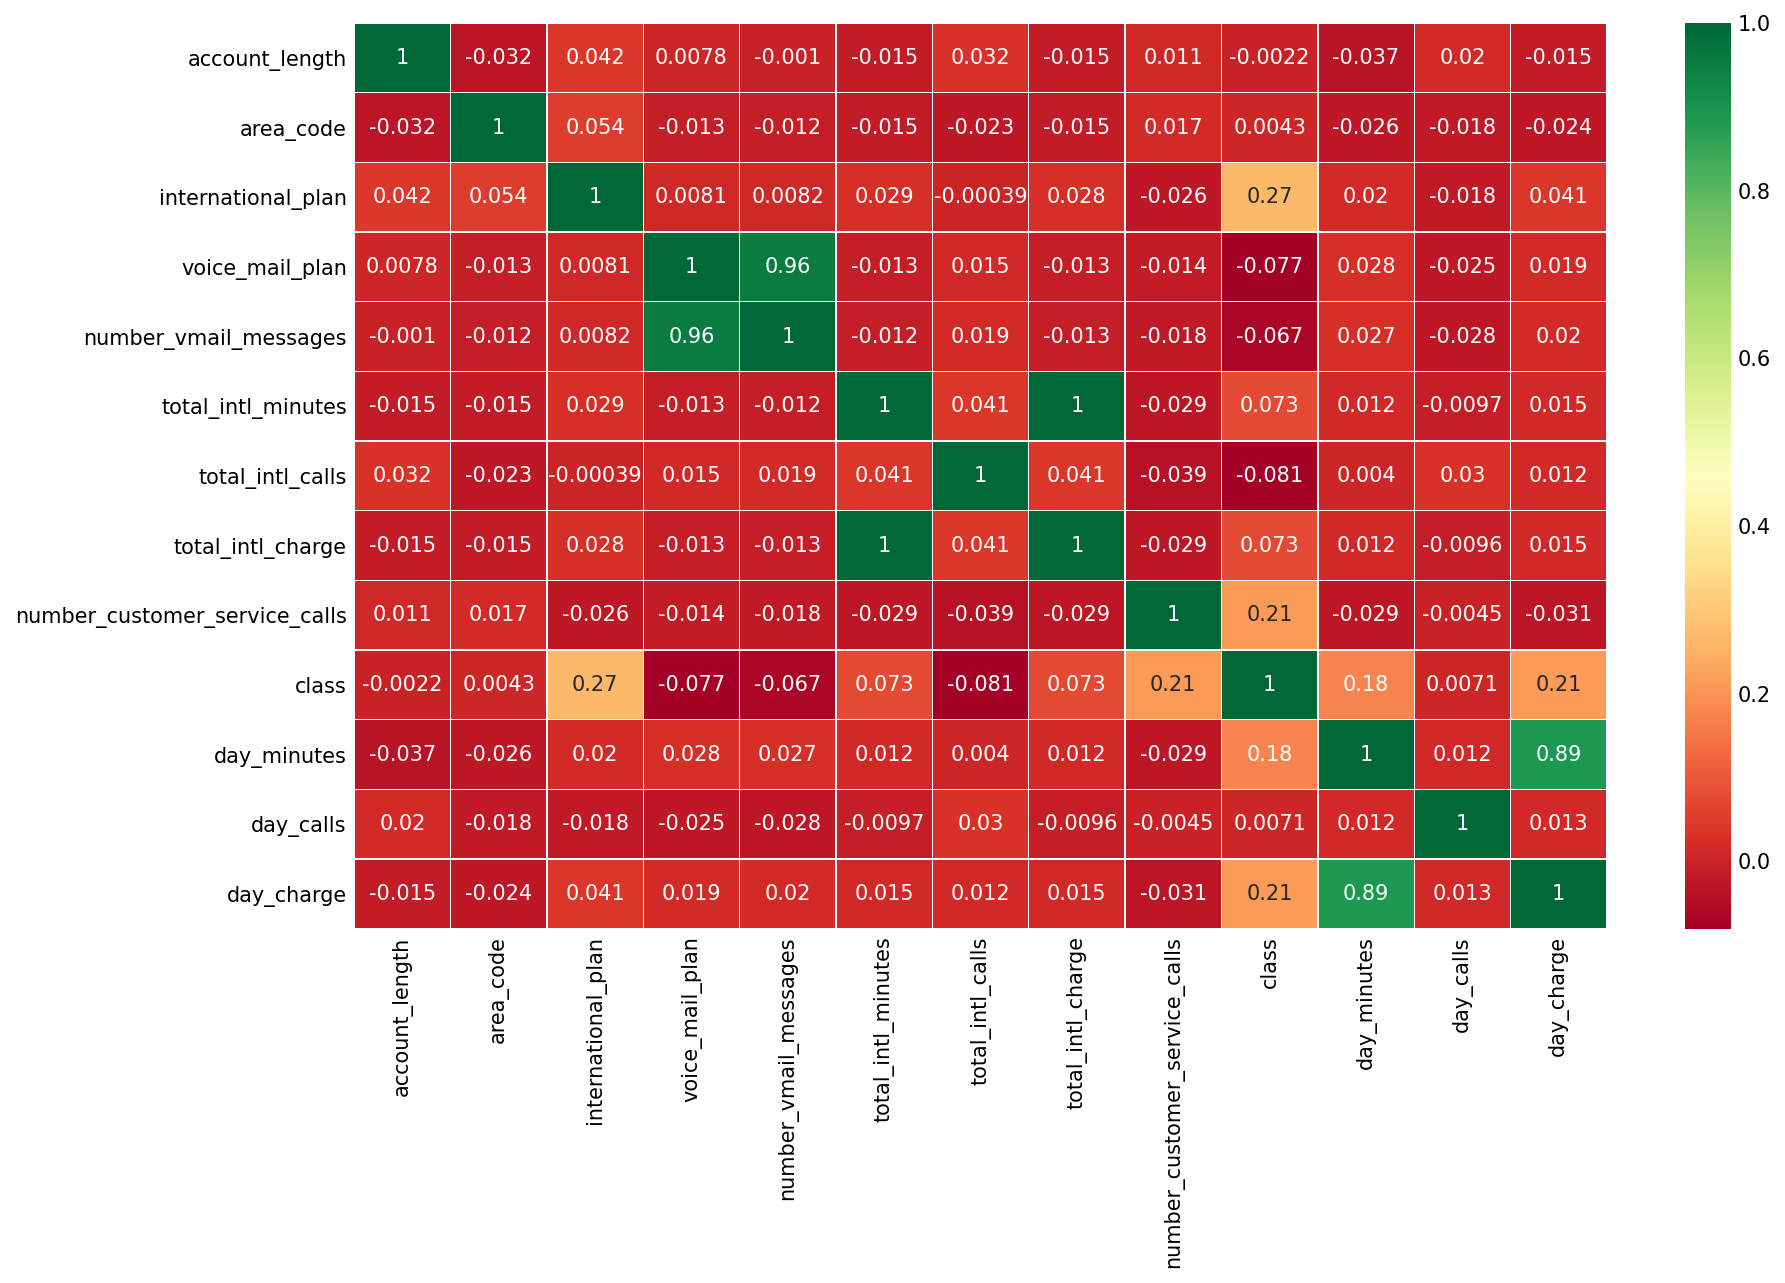

In [8]:
#原数据的 皮尔森相关系数
#注意：皮尔森相关系数只在连续型变量之间才有意义
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches((12, 8))
fig.set_dpi(150)
plt.show()

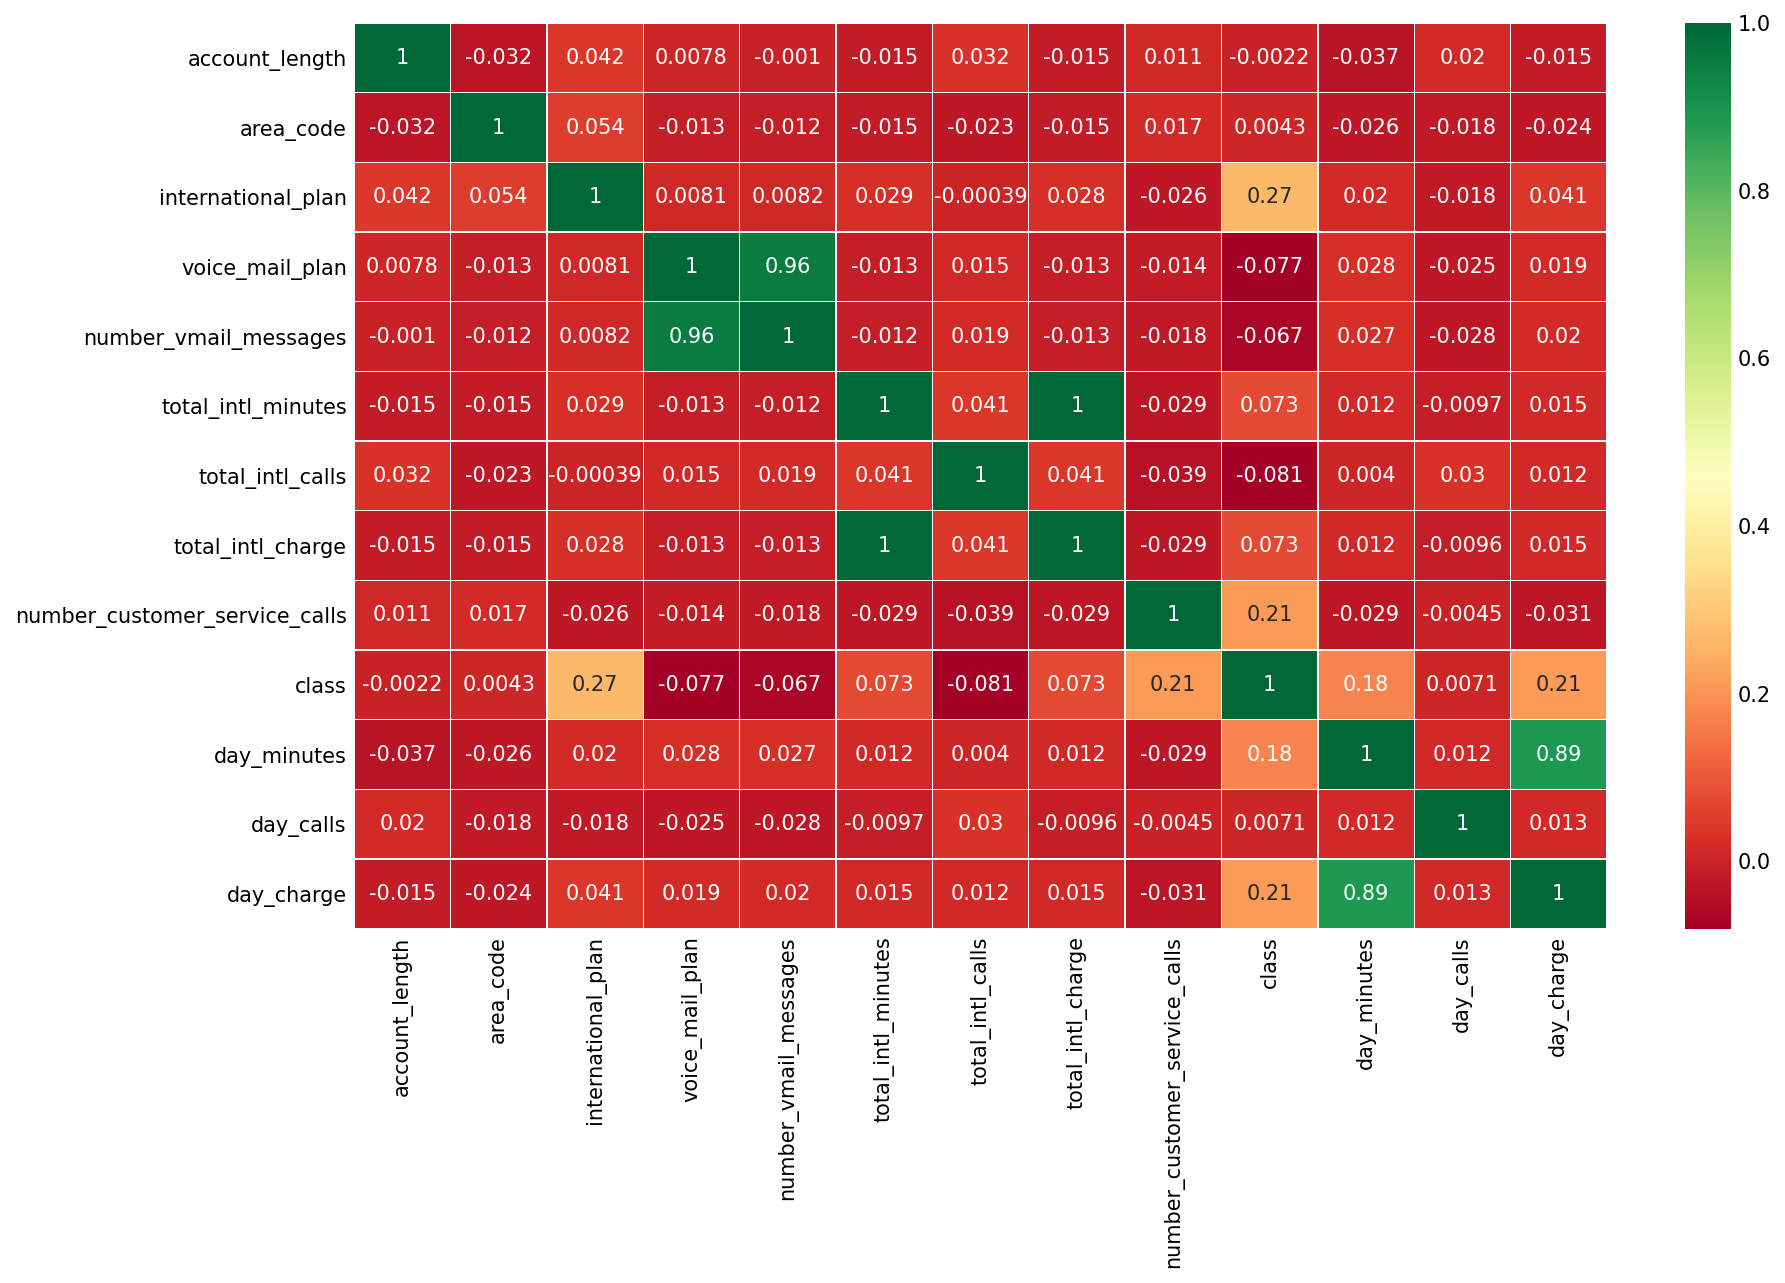

In [9]:
#聚集数据后的  皮尔森相关系数
#注意：皮尔森相关系数只在连续型变量之间才有意义
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches((12, 8))
fig.set_dpi(150)
plt.show()

In [10]:
data.drop(['total_intl_charge', 'day_charge'],axis = 1, inplace = True)

In [11]:
data.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_intl_minutes,total_intl_calls,number_customer_service_calls,class,day_minutes,day_calls
0,KS,128,415,382-4657,0,1,25,10.000000,3,1,0,707.200000,300
1,OH,84,408,375-9999,1,0,0,6.600000,7,2,0,558.200000,248
2,OK,75,415,330-6626,1,0,0,10.100000,3,3,0,501.900000,356
3,AL,118,510,391-8027,1,0,0,6.300000,6,0,0,647.900000,317
4,LA,117,408,335-4719,0,0,0,8.700000,4,1,0,751.900000,267


In [12]:
data.drop('phone_number', axis = 1,inplace = True)

In [13]:
data.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_intl_minutes,total_intl_calls,number_customer_service_calls,class,day_minutes,day_calls
0,KS,128,415,0,1,25,10.000000,3,1,0,707.200000,300
1,OH,84,408,1,0,0,6.600000,7,2,0,558.200000,248
2,OK,75,415,1,0,0,10.100000,3,3,0,501.900000,356
3,AL,118,510,1,0,0,6.300000,6,0,0,647.900000,317
4,LA,117,408,0,0,0,8.700000,4,1,0,751.900000,267


In [14]:
#复制数据，进行后续分箱，特征筛除操作
result = data.copy()
result['state'] =  LabelEncoder().fit_transform(result['state'])

In [15]:
#input a string
#Divide into 50 bins, and replace the value in 'result array' using the mean value of each bin
def KBins(str = ""):
    est = KBinsDiscretizer(n_bins = 50, encode = 'ordinal', strategy = 'kmeans')
    X = est.fit_transform(result[str].values.reshape(-1,1))
    X = est.inverse_transform(X).flatten().round().astype(dtype = 'int64')
    result[str] = X

In [16]:
#取整后分箱
result['total_intl_minutes'] = round(result['total_intl_minutes']).astype(dtype = 'int64')
result['day_minutes'] = round(result['day_minutes']).astype(dtype = 'int64')
KBins('day_minutes')
KBins('day_calls')
KBins('account_length')

In [17]:
result.T

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
state,16,35,36,1,18,49,39,13,46,45,...,50,10,46,15,35,40,49,39,6,42
account_length,128,82,77,119,119,142,73,87,91,77,...,91,123,59,119,95,77,68,27,184,73
area_code,415,408,415,510,408,415,415,408,510,510,...,415,510,415,415,415,415,415,510,510,415
international_plan,0,1,1,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
voice_mail_plan,1,0,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
number_vmail_messages,25,0,0,0,0,37,0,27,0,33,...,0,0,0,0,0,0,0,0,0,25
total_intl_minutes,10,7,10,6,9,11,9,14,8,10,...,16,10,13,14,15,12,10,14,5,14
total_intl_calls,3,7,3,6,4,5,5,4,3,5,...,6,4,8,3,7,5,4,6,10,4
number_customer_service_calls,1,2,3,0,1,0,0,1,3,1,...,3,4,3,5,1,2,3,2,2,0
class,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0


In [18]:
#卡方验证
train = result.drop('class', axis = 1)
predict = result['class']
col = train.columns
index = ['chivalue', 'pvalue']
chivalue, pvalue = chi2(train, predict)
showing = pd.DataFrame([chivalue, pvalue], columns = col, index = index)
showing.T

,chivalue,pvalue
state,7.596054,0.005850
account_length,0.149556,0.698960
area_code,0.149214,0.699287
international_plan,127.897709,0.000000
voice_mail_plan,8.521628,0.003510
number_vmail_messages,209.885776,0.000000
total_intl_minutes,7.760248,0.005341
total_intl_calls,17.993577,0.000022
number_customer_service_calls,100.762035,0.000000
day_minutes,862.464725,0.000000


In [19]:
#特征筛选 & 数据归一化处理
result.drop(['account_length', 'area_code', 'day_calls'], axis = 1, inplace = True)
Normalization = pd.DataFrame(MinMaxScaler().fit_transform(result), columns = result.columns)
Normalization.T

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
state,0.320000,0.700000,0.720000,0.020000,0.360000,0.980000,0.780000,0.260000,0.920000,0.900000,...,1.000000,0.200000,0.920000,0.300000,0.700000,0.800000,0.980000,0.780000,0.120000,0.840000
international_plan,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
voice_mail_plan,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
number_vmail_messages,0.510204,0.000000,0.000000,0.000000,0.000000,0.755102,0.000000,0.551020,0.000000,0.673469,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.510204
total_intl_minutes,0.555556,0.388889,0.555556,0.333333,0.500000,0.611111,0.500000,0.777778,0.444444,0.555556,...,0.888889,0.555556,0.722222,0.777778,0.833333,0.666667,0.555556,0.777778,0.277778,0.777778
total_intl_calls,0.150000,0.350000,0.150000,0.300000,0.200000,0.250000,0.250000,0.200000,0.150000,0.250000,...,0.300000,0.200000,0.400000,0.150000,0.350000,0.250000,0.200000,0.300000,0.500000,0.200000
number_customer_service_calls,0.111111,0.222222,0.333333,0.000000,0.111111,0.000000,0.000000,0.111111,0.333333,0.111111,...,0.333333,0.444444,0.333333,0.555556,0.111111,0.222222,0.333333,0.222222,0.222222,0.000000
class,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
day_minutes,0.735395,0.467354,0.386598,0.634021,0.817869,0.902062,0.448454,0.484536,0.448454,0.484536,...,0.553265,0.307560,0.347079,0.534364,0.501718,0.448454,0.501718,0.652921,0.386598,0.797251


In [22]:
data.to_csv("C:\\Users\\XRUI\\Desktop\\churn_training1.csv", index=False)
result.to_csv("C:\\Users\\XRUI\\Desktop\\churn_training2.csv", index=False)

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
0,KS,128,415,382-4657,0,1,25,265.100000,110,45.070000,...,99,16.780000,244.700000,91,11.010000,10.000000,3,2.700000,1,0
1,OH,84,408,375-9999,1,0,0,299.400000,71,50.900000,...,88,5.260000,196.900000,89,8.860000,6.600000,7,1.780000,2,0
2,OK,75,415,330-6626,1,0,0,166.700000,113,28.340000,...,122,12.610000,186.900000,121,8.410000,10.100000,3,2.730000,3,0
3,AL,118,510,391-8027,1,0,0,223.400000,98,37.980000,...,101,18.750000,203.900000,118,9.180000,6.300000,6,1.700000,0,0
4,LA,117,408,335-4719,0,0,0,184.500000,97,31.370000,...,80,29.890000,215.800000,90,9.710000,8.700000,4,2.350000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,SC,79,415,348-3830,0,0,0,134.700000,98,22.900000,...,68,16.120000,221.400000,128,9.960000,11.800000,5,3.190000,2,0
1996,WV,68,415,370-3271,0,0,0,231.100000,57,39.290000,...,55,13.040000,191.300000,123,8.610000,9.600000,4,2.590000,3,0
1997,RI,28,510,328-8230,0,0,0,180.800000,109,30.740000,...,58,24.550000,191.900000,91,8.640000,14.100000,6,3.810000,2,0
1998,CT,184,510,364-6381,1,0,0,213.800000,105,36.350000,...,84,13.570000,139.200000,137,6.260000,5.000000,10,1.350000,2,0


False


In [199]:
#绘制学习曲线，不必理会
def learningCurve(up, down, step):
    score = []
    for i in range(up, down, step):
        x_fschi = SelectKBest(chi2, k = i).fit_transform(data_backup.drop(['class', 'state', 'phone_number'], axis = 1), data['class'])
        once = cross_val_score(RFC(n_estimators = 10, random_state = 0), x_fschi, y, cv = 5).mean()
        score.append(once)
    plt.plot(range(up, down, step), score)
    plt.show()